# SubScript Exploratory Data Analysis

## Dependencies and Defaults

In [42]:
import config as cn
import pandas as pd
import numpy as np
import os
from IPython.display import HTML

In [58]:
dir_home = cn.home_dir
dir_clean = cn.clean_dir
dir_processed = cn.processed_dir
dir_raw = cn.raw_dir
f_in = os.path.join(dir_clean,  'trimmed_6-8_dates_100_26800_300.csv')

## Clean Player Data

#### Load general player data

In [59]:
# Load player data
df = pd.read_csv(f_in)
df = df.drop_duplicates()
df['id'] = df.player + '_' + df.realm
df = df.set_index('id')
del_cols = [c for c in df.columns.values if 'unnamed' in c.lower()]
df = df.drop(del_cols, axis = 1)
df = df.dropna()

#if 'engagement' not in df.columns.values:
df['engagement'] = np.nan
for index, row in df.iterrows():
    if int(row.time_since_login.split(' ')[0]) <= 30:
        df.at[index,'engagement'] = 1
        df.at[index,'status'] = 'subscribed'
    elif int(row.time_since_login.split(' ')[0]) <= 180:
        df.at[index,'engagement'] = 2
        df.at[index,'status'] = 'lapsed'
    elif int(row.time_since_login.split(' ')[0]) <= 365:
        df.at[index,'engagement'] = 3
        df.at[index,'status'] = 'unsubscribed'
df.to_csv(f_in)
display(HTML(df.head().to_html()))

,player,realm,gear_score,last_login,time_since_login,2007-01,2008-01,2009-01,2010-01,2011-01,2012-01,2013-01,2014-01,2015-01,2016-01,2017-01,2018-01,2019-01,2020-01,2011-02,2012-02,2013-02,2014-02,2015-02,2016-02,2017-02,2018-02,2019-02,2020-02,2011-03,2012-03,2013-03,2014-03,2015-03,2016-03,2017-03,2018-03,2019-03,2020-03,2011-04,2012-04,2013-04,2014-04,2015-04,2016-04,2017-04,2018-04,2019-04,2020-04,2011-05,2012-05,2013-05,2014-05,2015-05,2016-05,2017-05,2018-05,2019-05,2020-05,2011-06,2012-06,2013-06,2014-06,2015-06,2016-06,2017-06,2018-06,2019-06,2020-06,2011-07,2012-07,2013-07,2014-07,2015-07,2016-07,2017-07,2018-07,2019-07,2011-08,2012-08,2013-08,2014-08,2015-08,2016-08,2017-08,2018-08,2019-08,2020-08,2011-09,2012-09,2013-09,2014-09,2015-09,2016-09,2017-09,2018-09,2019-09,2020-09,2011-10,2012-10,2013-10,2014-10,2015-10,2016-10,2017-10,2018-10,2019-10,2020-10,2011-11,2012-11,2013-11,2014-11,2015-11,2016-11,2017-11,2018-11,2019-11,2020-11,2011-12,2012-12,2013-12,2014-12,2015-12,2016-12,2017-12,2018-12,2019-12,2020-12,engagement,status
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
effeta_ragnaros,effeta,ragnaros,469.0,2020-06-08,-3 days +00:00:00.000000000,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,7.0,3.0,10.0,18.0,5.0,6.0,1.0,1.0,1.0,0.0,8.0,3.0,13.0,7.0,12.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0,21.0,7.0,62.0,5.0,0.0,1.0,0.0,0.0,1.0,1.0,76.0,5.0,78.0,3.0,5.0,1.0,0.0,1.0,2.0,9.0,102.0,8.0,106.0,0.0,0.0,1.0,24.0,6.0,3.0,7.0,26.0,10.0,6.0,3.0,1.0,0.0,32.0,1.0,12.0,8.0,11.0,15.0,4.0,3.0,0.0,13.0,1.0,5.0,6.0,20.0,16.0,0.0,9.0,8.0,2.0,30.0,3.0,3.0,7.0,8.0,13.0,0.0,9.0,3.0,0.0,4.0,2.0,10.0,7.0,8.0,4.0,0.0,4.0,2.0,0.0,1.0,4.0,4.0,5.0,8.0,5.0,0.0,1.0,0.0,1.0,5.0,3.0,2.0,21.0,30.0,12.0,0.0,1.0,subscribed
shír_ragnaros,shír,ragnaros,419.0,2020-06-09,-4 days +00:00:00.000000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,25.0,11.0,11.0,6.0,1.0,1.0,1.0,0.0,4.0,1.0,35.0,3.0,4.0,1.0,2.0,2.0,0.0,0.0,2.0,0.0,109.0,11.0,17.0,3.0,0.0,1.0,0.0,0.0,1.0,51.0,51.0,8.0,10.0,1.0,0.0,1.0,0.0,1.0,2.0,39.0,40.0,14.0,22.0,0.0,0.0,1.0,3.0,4.0,3.0,19.0,7.0,11.0,1.0,3.0,1.0,0.0,4.0,1.0,7.0,17.0,10.0,10.0,3.0,3.0,0.0,2.0,0.0,2.0,0.0,62.0,13.0,0.0,2.0,8.0,2.0,23.0,2.0,0.0,6.0,86.0,7.0,0.0,6.0,3.0,0.0,3.0,0.0,4.0,13.0,29.0,13.0,0.0,0.0,2.0,0.0,1.0,4.0,3.0,16.0,12.0,11.0,0.0,0.0,0.0,1.0,5.0,2.0,1.0,22.0,18.0,10.0,0.0,1.0,subscribed
razorwind_ragnaros,razorwind,ragnaros,446.0,2020-04-30,36 days 00:00:00.000000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,2.0,8.0,9.0,17.0,1.0,1.0,1.0,1.0,0.0,5.0,4.0,24.0,3.0,3.0,1.0,2.0,2.0,0.0,34.0,2.0,5.0,8.0,7.0,8.0,1.0,0.0,0.0,0.0,32.0,4.0,2.0,9.0,5.0,11.0,1.0,0.0,1.0,0.0,15.0,15.0,18.0,14.0,6.0,17.0,0.0,0.0,1.0,3.0,17.0,18.0,4.0,8.0,8.0,1.0,1.0,1.0,0.0,3.0,14.0,25.0,6.0,13.0,24.0,2.0,3.0,0.0,0.0,24.0,8.0,7.0,52.0,80.0,0.0,0.0,8.0,2.0,23.0,3.0,10.0,1.0,16.0,35.0,0.0,0.0,3.0,0.0,3.0,7.0,17.0,3.0,7.0,7.0,0.0,0.0,2.0,0.0,1.0,9.0,4.0,7.0,11.0,5.0,0.0,0.0,0.0,0.0,28.0,4.0,4.0,5.0,12.0,28.0,0.0,2.0,lapsed
neocivica_ragnaros,neocivica,ragnaros,433.0,2019-08-28,282 days 00:00:00.000000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,2.0,7.0,9.0,10.0,1.0,1.0,1.0,1.0,0.0,5.0,3.0,8.0,3.0,3.0,1.0,2.0,2.0,0.0,32.0,1.0,5.0,5.0,6.0,8.0,1.0,0.0,0.0,0.0,28.0,4.0,2.0,8.0,5.0,11.0,1.0,0.0,1.0,0.0,14.0,14.0,13.0,13.0,5.0,17.0,0.0,0.0,1.0,2.0,17.0,11.0,4.0,8.0,59.0,1.0,1.0,2.0,0.0,3.0,12.0,14.0,6.0,7.0,99.0,1.0,4.0,0.0,0.0,20.0,7.0,6.0,19.0,66.0,0.0,0.0,8.0,2.0,23.0,3.0,7.0,1.0,8.0,16.0,0.0,0.0,3.0,0.0,3.0,7.0,11.0,3.0,4.0,6.0,0.0,0.0,2.0,0.0,1.0,7.0,3.0,6.0,11.0,4.0,0.0,0.0,0.0,0.0,22.0,2.0,2.0,3.0,6.0,25.0,0.0,3.0,unsubscribed
kaiseos_ragnaros,kaiseos,ragnaros,432.0,2020-06-09,-4 days +00:00:00.000000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,13.0,33.0,24.0,13.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,53.0,7.0,8.0,1.0,2.0,2.0,0.0,2.0,1.0,1.0,26.0,11.0,8.0,1.0,0.0,0.0,0.0,4.0,3.0,0.0,33.0,38.0,12.0,1.0,0.0,1.0,0.0,4.0,7.0,1.0,28.0,23.0,26.0,0.0,0.0,1.0,1.0,6.0,8.0,0.0,11.0,20.0,3.0,1.0,1.0,

#### Remove duplicates and set the index to id column

In [60]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4987 entries, effeta_ragnaros to durindal_amanthul
Columns: 130 entries, player to status
dtypes: float64(125), object(5)
memory usage: 5.0+ MB


In [61]:
df.describe()

,gear_score,2007-01,2008-01,2009-01,2010-01,2011-01,2012-01,2013-01,2014-01,2015-01,...,2012-12,2013-12,2014-12,2015-12,2016-12,2017-12,2018-12,2019-12,2020-12,engagement
count,4987.000000,4987.0,4987.0,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,...,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.0,4987.000000
mean,418.765992,0.0,0.0,5.003409,3.271305,5.831161,2.917987,6.308001,4.684780,9.926810,...,7.776820,4.994987,16.262683,8.290756,8.398235,8.100461,13.625025,11.502105,0.0,1.443152
std,55.484570,0.0,0.0,8.790207,6.213412,9.662120,6.651087,10.956034,9.835005,14.646498,...,11.931333,10.401727,20.183484,13.824036,16.111930,12.742227,14.954462,19.677824,0.0,0.642560
min,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,396.000000,0.0,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,3.000000,...,1.000000,1.000000,5.000000,2.000000,1.000000,2.000000,5.000000,3.000000,0.0,1.000000
50%,431.000000,0.0,0.0,2.000000,1.000000,3.000000,1.000000,3.000000,2.000000,5.000000,...,4.000000,2.000000,11.000000,4.000000,4.000000,4.000000,9.000000,6.000000,0.0,1.000000
75%,460.000000,0.0,0.0,5.000000,4.000000,6.000000,3.000000,7.000000,5.000000,11.000000,...,9.000000,5.000000,20.000000,9.000000,9.000000,9.000000,17.000000,12.000000,0.0,2.000000
max,486.000000,0.0,0.0,125.000000,102.000000,96.000000,158.000000,179.000000,151.000000,268.000000,...,170.000000,258.000000,439.000000,236.000000,296.000000,191.000000,212.000000,541.000000,0.0,3.000000


## Histograms of Engagement

(-25.0, 325.0)

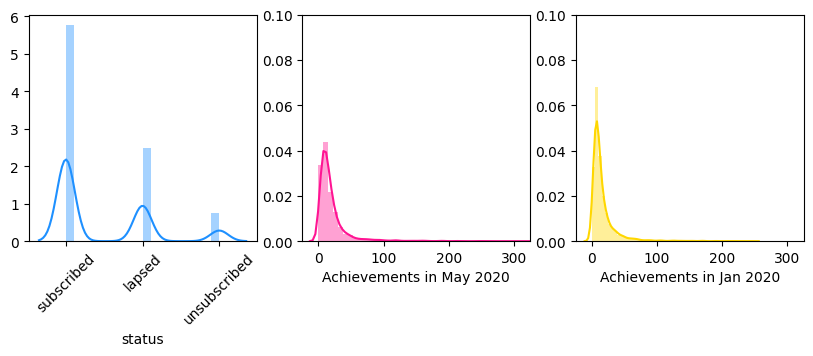

In [80]:
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(10, 3), dpi=100)
a = sns.distplot(df.engagement, color="dodgerblue", ax=axes[0], axlabel='status')
b = sns.distplot(df['2020-05'] , color="deeppink", ax=axes[1], axlabel='Achievements in May 2020')
c = sns.distplot(df['2020-01'] , color="gold", ax=axes[2], axlabel='Achievements in Jan 2020')

a.set_xticklabels(df.status, rotation = 45)
b.set_ylim([0,0.1])
c.set_ylim([0,0.1])
b.set_xlim([-25,325])
c.set_xlim([-25,325])

## Histograms of Achievements over Last 2 years

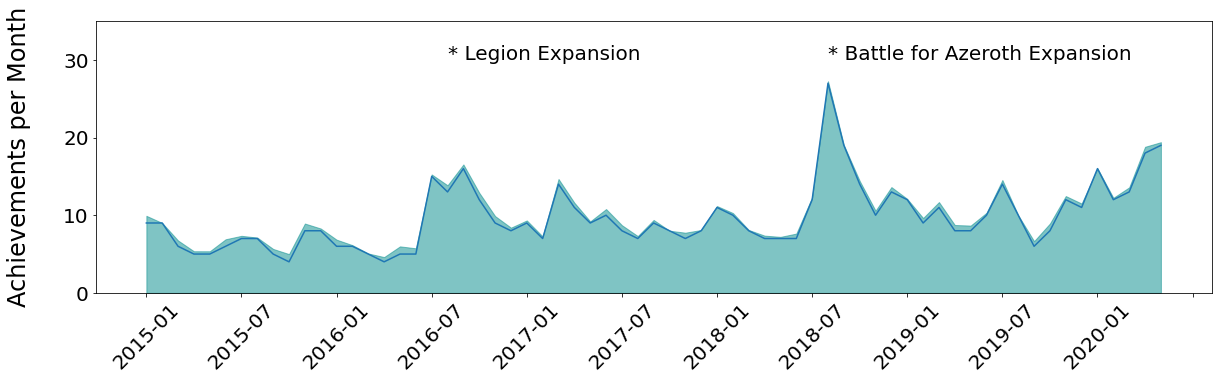

In [138]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize = (20, 5) )
df_time = df[['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', 
              '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', 
              '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', 
              '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', 
              '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', 
              '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', 
              '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', 
              '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', 
              '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', 
              '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', 
              '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', 
              '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', 
              '2020-01', '2020-02', '2020-03', '2020-04', '2020-05']]
df_timem = df_time.mean().transpose().reset_index()
df_timem.columns = ['date', 'count']
d = sns.lineplot(data = df_timem, x = 'date', y = df_timem['count'].astype(int)) 
d.xaxis.set_major_locator (ticker.MultipleLocator(6))
d.set_ylim(0,35)
d.annotate('* Legion Expansion', xy = ('2016-08',30), fontsize = 20)
d.annotate('* Battle for Azeroth Expansion', xy = ('2018-08',30), fontsize = 20)
d.tick_params(axis = 'x', labelsize = 20, rotation = 45)
d.tick_params(axis = 'y', labelsize = 20)
d.set_xlabel('',fontsize = 20)
d.set_ylabel('Achievements per Month\n',fontsize = 24)
d.fill_between(df_timem.date, df_timem['count'], color = 'darkcyan', alpha = 0.5)